In [1]:
!pip install finance-datareader

   ---------------------------------------- 0.0/48.2 kB ? eta -:--:--
   ---------------------------------------- 48.2/48.2 kB ? eta 0:00:00
   ---------------------------------------- 0.0/105.1 kB ? eta -:--:--
   ---------------------------------------- 105.1/105.1 kB 6.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
   ------ --------------------------------- 0.6/4.0 MB 12.9 MB/s eta 0:00:01
   ---------------- ----------------------- 1.7/4.0 MB 17.6 MB/s eta 0:00:01
   -------------------------------- ------- 3.2/4.0 MB 22.9 MB/s eta 0:00:01
   ---------------------------------------- 4.0/4.0 MB 23.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ------------ --------------------------- 3.0/9.8 MB 62.7 MB/s eta 0:00:01
   ------------- -------------------------- 3.3/9.8 MB 34.6 MB/s eta 0:00:01
   ------------- -------------------------- 3.3/9.8 MB 26.5 MB/s eta 0:00:01
   ------------- --------------


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import FinanceDataReader as fdr  # 금융 데이터를 쉽게 불러오는 라이브러리
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
plt.rcParams["font.family"] = "Malgun Gothic"

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_7396\3837963398.py:8: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['환율 수익률'] = df['환율'].pct_change() * 100 # 퍼센트(%) 변동률로 변환
C:\Users\SSAFY\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


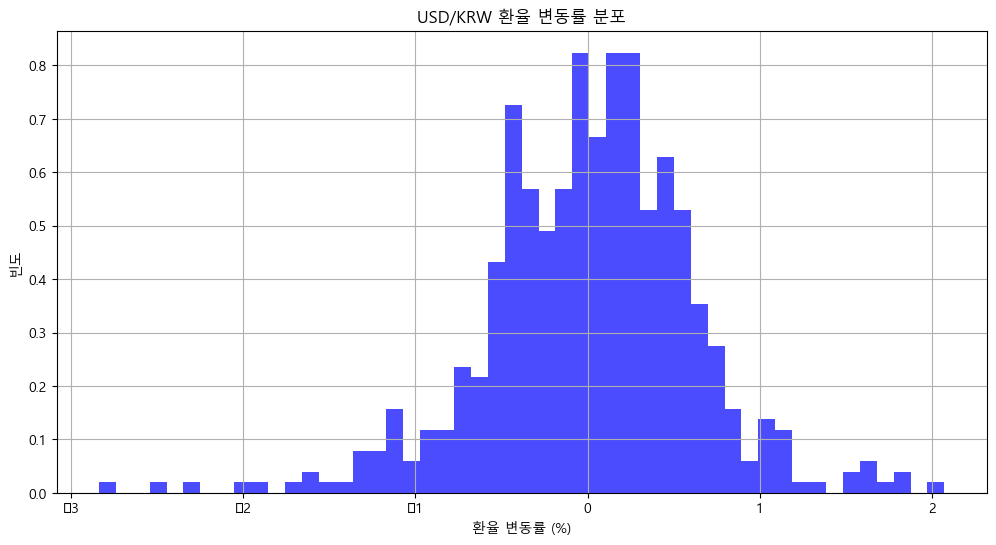

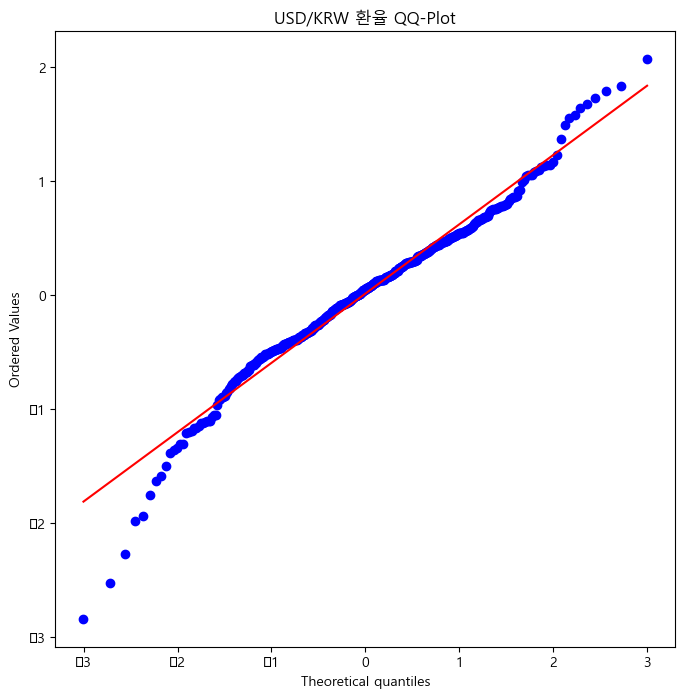

In [3]:
# 1. USD/KRW 환율 데이터 불러오기
df = fdr.DataReader('USD/KRW', '2023-07-10', '2025-07-10') # 3년치 데이터 가져오기
#df.describe()
df = df[['Close']] # 종가 (Close) 데이터만 사용
df = df.rename(columns={'Close' : '환율'}) # 컬럼명 변경

# 2. 환율 변동률(수익률) 계산
df['환율 수익률'] = df['환율'].pct_change() * 100 # 퍼센트(%) 변동률로 변환
df = df.dropna() # 첫 번째 NaN 값 제거

# 3. 히스토그램 그리기
plt.figure(figsize=(12, 6))
plt.hist(df['환율 수익률'], bins=50, density=True, alpha=0.7, color='blue')
plt.title('USD/KRW 환율 변동률 분포')
plt.xlabel('환율 변동률 (%)')
plt.ylabel('빈도')
plt.grid(True)
plt.show()

# 4. QQ-Plot 그리기 (정규성 확인)
plt.figure(figsize=(8, 8))
stats.probplot(df['환율 수익률'], dist='norm', plot=plt)
plt.title("USD/KRW 환율 QQ-Plot")
plt.show()